# From Hypothesis Testing to Parameter Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

### Measuring the Bayes Factor

BF = <sup>P(D<sub>n</sub>|H)</sup>/<sub>P(D<sub>n</sub>|<SPAN STYLE="text-decoration:overline">H</SPAN>)</sub> = <sup>1</sup>/<sub>0.5<sup>n</sup></sub>

### Prior Odds

prior odds = O(H) = <sup>P(H)</sup>/<sub>P(<SPAN STYLE="text-decoration:overline">H</SPAN>)</sub>

Notes:

- Hypotheses is plural of Hopothesis

- Opted back to np.linespace instead of np.arange to keep length of arrays the same

## Searching for More Hypothesis with Python

In [2]:
dx = 0.01

In [3]:
# hypotheses = np.arange(0,1+dx,dx)
hypotheses = np.linspace(0,1,100)

In [4]:
def bayes_factor(h_top, h_bottom):
    num = (h_top**24) * ((1-h_top)**76)
    denom = (h_bottom**24) * ((1-h_bottom)**76)
    return num/denom

In [5]:
bayes_factors = [bayes_factor(h, 0.5) for h in hypotheses]
bayes_factors = np.array(bayes_factors)

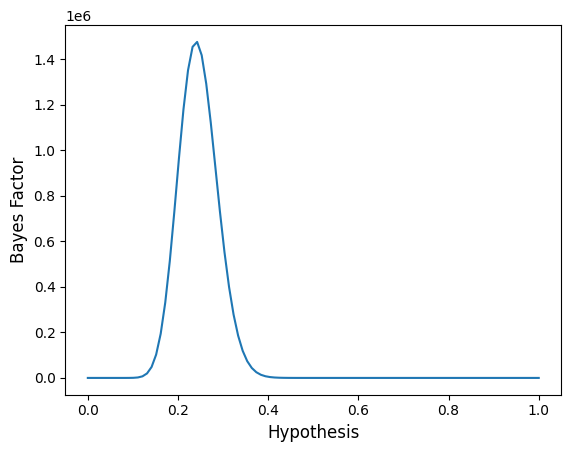

In [6]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Bayes Factor', fontsize=12)
plt.plot(hypotheses, bayes_factors)

Largest Bayes Factor

In [7]:
max(bayes_factors)

1476406.4216273492

Hypothesis associated with largest Bayes Factor

In [8]:
hypotheses[np.argmax(bayes_factors)]

0.24242424242424243

### Adding Priors to Our Likelihood Ratios


In [9]:
priors = list()

for h in hypotheses:
    if h >= 0.2 and h <= 0.3:
        priors.append(0.001) # 1/1000
    else:
        priors.append(1)

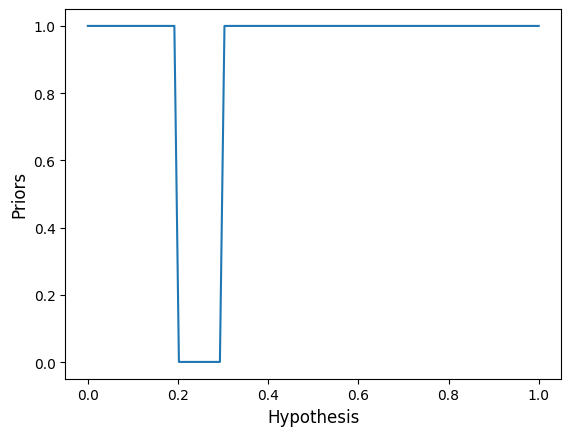

In [10]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Priors', fontsize=12)
plt.plot(hypotheses, priors)

Visualising our prior odds ratios

In [11]:
posteriors = priors * bayes_factors

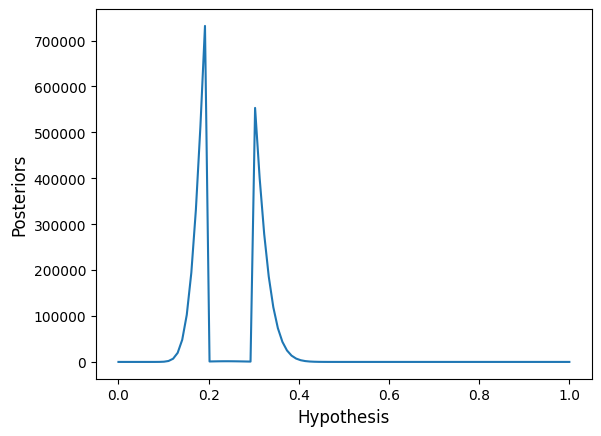

In [12]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Posteriors', fontsize=12)
plt.plot(hypotheses, posteriors)

Plotting our distribution of Bayes factors

### Adding Priors to Our Likelihood Ratios


The sum of our posterior probablities sums to more than one

In [13]:
sum(posteriors)

3671239.221796078

We will normalise our posterior odds so that they sum up to 1.

To do so, we simply divide each value in our posteriors vector by the sum of all the values:

In [14]:
p_posteriors = posteriors/sum(posteriors)

In [15]:
sum(p_posteriors)

0.9999999999999997

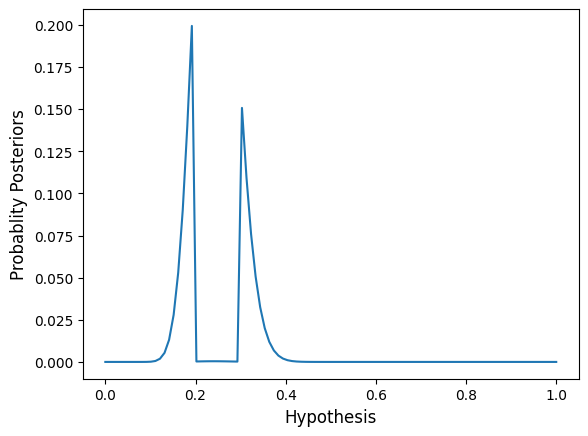

In [16]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Probablity Posteriors', fontsize=12)
plt.plot(hypotheses, p_posteriors)

The probability that the prize rate is lower than 0.5 (the attendant's hypothesis) is:

In [17]:
sum(p_posteriors[hypotheses < 0.5])

0.9999997611330593

almost 1. We can be almost certain that the attendant is overstating the true prize rate

We can calculate the expectation of our distribution and use this result as our estimate for the true probability.

The expectation is just the sum of the estimates weighted by their value:

In [18]:
sum(p_posteriors*hypotheses)

0.2450326063938458

We might want to simply choose the most *likely* estimate

In [19]:
hypotheses[np.argmax(p_posteriors)]

0.19191919191919193

Now we've used the Bayes factor to come up with a range of probablilistic estimates for the true possible rate of winning a prize in the duck game. This means that we've used the Bayes Factor as a form of parameter estimation!

### From the Bayes Factor to Parameter Estimation


In [20]:
x = np.linspace(0.0, 1.0, 100)

In [21]:
a = 24 # alpha
b = 76 # beta

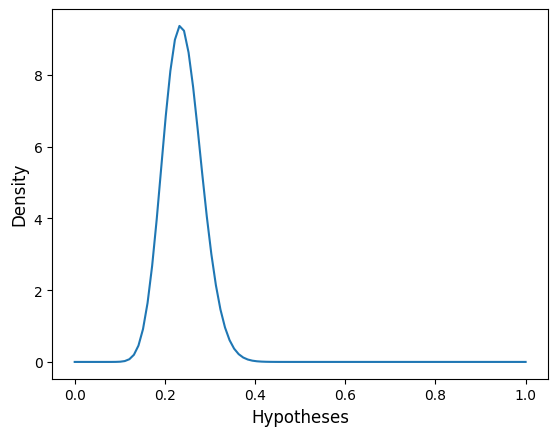

In [22]:
density = beta.pdf(x, a, b)

plt.xlabel('Hypotheses', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.plot(x, density)

The beta distribution with an alpha of 24 and beta of 76

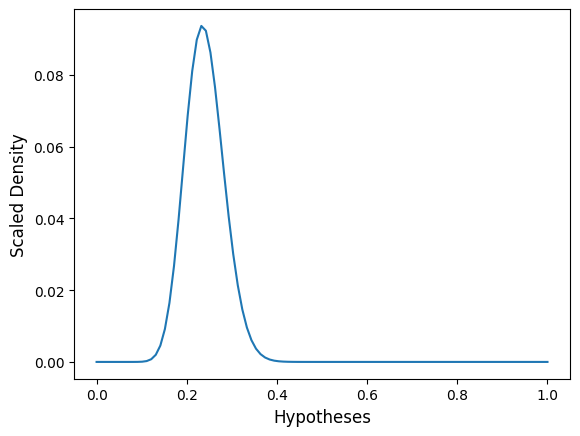

In [23]:
scaled_density = density * dx

plt.xlabel('Hypotheses', fontsize=12)
plt.ylabel('Scaled Density', fontsize=12)

plt.plot(x, scaled_density)

The beta distribution with an alpha of 24 and beta of 76 with scaled density

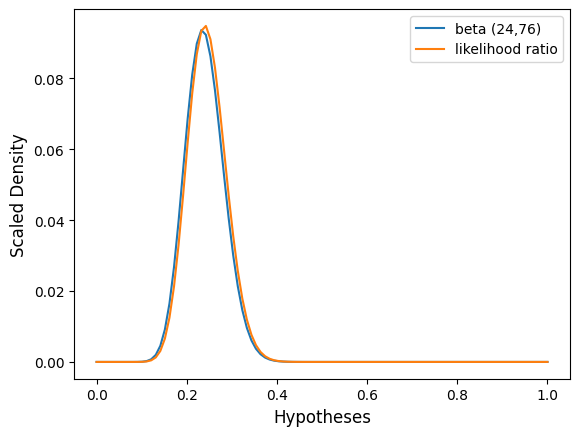

In [24]:
scaled_bayes_factors = bayes_factors / sum(bayes_factors)

plt.xlabel('Hypotheses', fontsize=12)
plt.ylabel('Scaled Density', fontsize=12)

plt.plot(x, scaled_density, label='beta (24,76)')
plt.plot(x, scaled_bayes_factors, label='likelihood ratio')

plt.legend(loc='upper right')

Our initial distribution of likelihood ratios maps pretty closely to Beta(24,76)

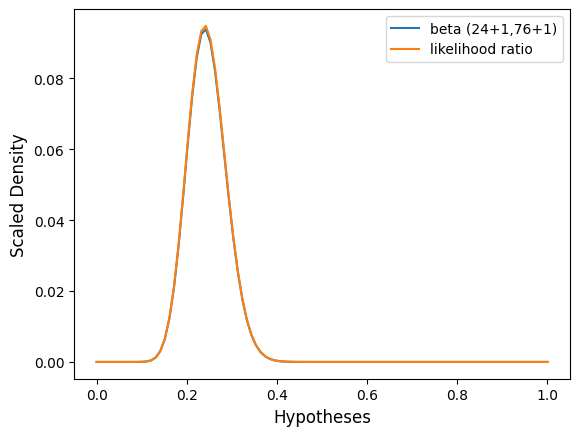

In [25]:
a = 24 + 1 # alpha
b = 76 + 1 # beta

density = beta.pdf(x, a, b)
scaled_density = density * dx

scaled_bayes_factors = bayes_factors / sum(bayes_factors)

plt.xlabel('Hypotheses', fontsize=12)
plt.ylabel('Scaled Density', fontsize=12)

plt.plot(x, scaled_density, label='beta (24+1,76+1)')
plt.plot(x, scaled_bayes_factors, label='likelihood ratio')

plt.legend(loc='upper right')

Our likelihood ratios map perfectly to a Beta(24+1, 76+1) distribution

---

# Exercise 1

Our Bayes factor assumed that we were looking at H<sub>1</sub>:P(prize) = 0.5.
This allowed us to derive a version of the beta distribution with an alpha of 1 and a beta of 1.
Would it matter if we chose a different probability for H<sub>1</sub>?
Assume H<sub>1</sub>: P(prize) = 0.24, then see if the resulting distribution, once normalized to sum to 1, is any different than the original hypothesis.

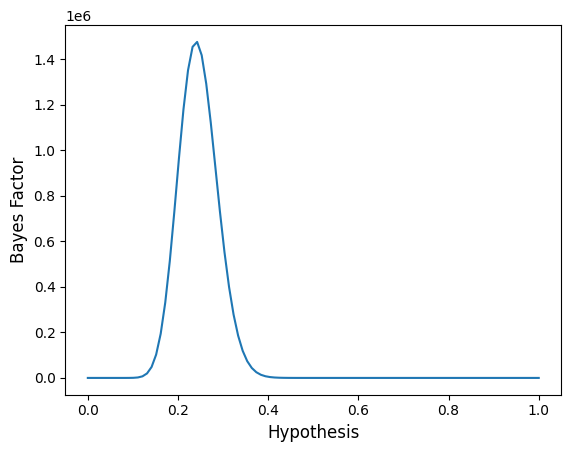

In [26]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Bayes Factor', fontsize=12)
plt.plot(hypotheses, bayes_factors)

In [27]:
bayes_factors_2 = [bayes_factor(h, 0.24) for h in hypotheses]
bayes_factors_2 = np.array(bayes_factors_2)

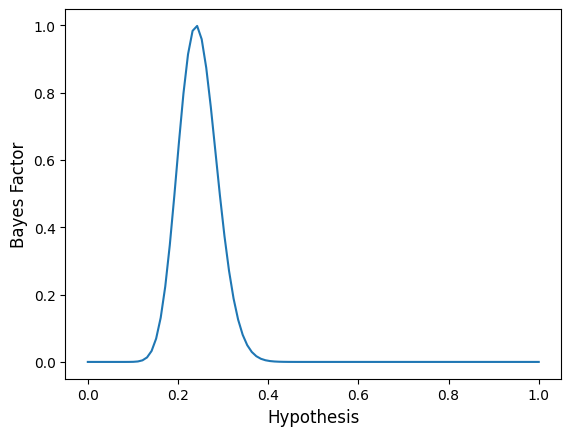

In [28]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Bayes Factor', fontsize=12)
plt.plot(hypotheses, bayes_factors_2)

Choosing a weaker or stronger hypothesis changes only the scale of the distribution, not the its shape.

In [29]:
scaled_bayes_factors_2 = bayes_factors_2 / sum(bayes_factors_2)

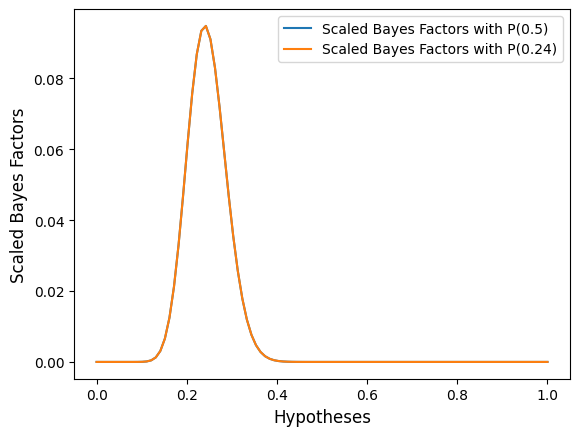

In [30]:
plt.xlabel('Hypotheses', fontsize=12)
plt.ylabel('Scaled Bayes Factors', fontsize=12)

plt.plot(hypotheses, scaled_bayes_factors, label='Scaled Bayes Factors with P(0.5)')
plt.plot(hypotheses, scaled_bayes_factors_2, label='Scaled Bayes Factors with P(0.24)')

plt.legend(loc='upper right')

The normalized plot of the resulting bayes factors are identifical

# Exercise 2

Write a prior for the distribution in which each hypothesis is 1.05 times more likely than the previous (assume dx remains the same)

In [31]:
# We change the priors so the
# first element is 1 and the rest 1.05

ex2_hypotheses = np.append([1],np.repeat(1.05, len(hypotheses) - 1))

# now calculate cumulative product
ex2_priors = np.cumprod(ex2_hypotheses)

We re-use the bayes_factors based on P(prize) = 0.5

In [32]:
# calculate posteriors and normalise them
ex2_posteriors = bayes_factors * ex2_priors
ex2_p_posteriors = ex2_posteriors/sum(ex2_posteriors)

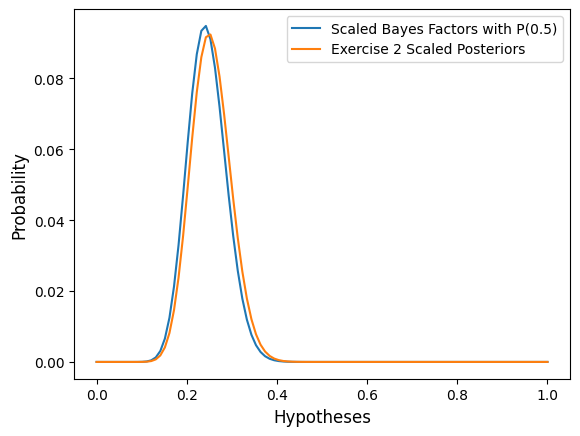

In [33]:
plt.xlabel('Hypotheses', fontsize=12)
plt.ylabel('Probability', fontsize=12)


plt.plot(hypotheses, scaled_bayes_factors, label='Scaled Bayes Factors with P(0.5)')
plt.plot(hypotheses, ex2_p_posteriors, label='Exercise 2 Scaled Posteriors')

plt.legend(loc='upper right')
plt.show()

Using different Hypothesis (Prior) values in Excercise 2  doesn't change the overall posterior probability due to the small value of the Bayes Factor with P(0.5)

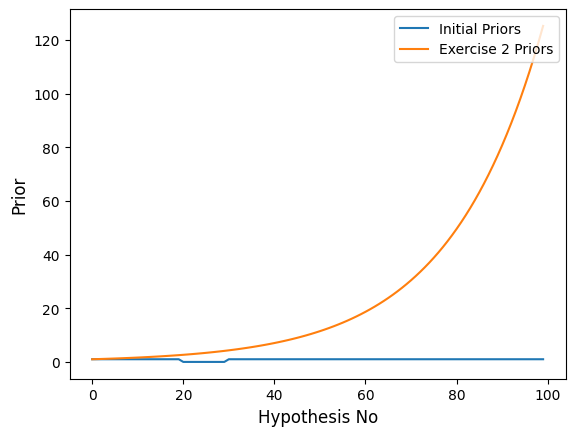

In [34]:
plt.xlabel('Hypothesis No', fontsize=12)
plt.ylabel('Prior', fontsize=12)

hypothesis_no = np.arange(0,100)

plt.plot(hypothesis_no, priors, label='Initial Priors')
plt.plot(hypothesis_no, ex2_priors, label='Exercise 2 Priors')

plt.legend(loc='upper right')

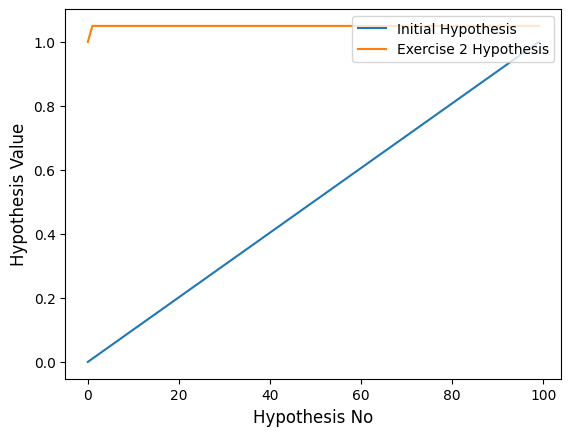

In [35]:
plt.xlabel('Hypothesis No', fontsize=12)
plt.ylabel('Hypothesis Value', fontsize=12)

hypothesis_no = np.arange(0,100)

plt.plot(hypothesis_no, hypotheses, label='Initial Hypothesis')
plt.plot(hypothesis_no, ex2_hypotheses, label='Exercise 2 Hypothesis')

plt.legend(loc='upper right')